# Program - print out profiles SCM

**Content:**
Print out profiles in TaiESM SCM

**Author**: Yi-Hsuan Chen (yihsuan@umich.edu)

In [249]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import io, os, sys, types

import yhc_module as yhc

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

## Open SCM file

In [250]:
#--- open SCM file
datapath = "/lfs/home/yihsuanc/test/c1-scam-tendencies/xy01-scam_test.twp06.taiphy.0327170840/run/"

#--- single file
#filename_scm = "xy01-scam_test.twp06.taiphy.0229162841.camrun.cam.h0.2006-01-17-10800.nc"
filename_scm = "camrun.cam.h0.2006-01-17-10800.nc"
file_scm = datapath+"/"+filename_scm

ds_scm = xr.open_dataset(file_scm)
#ds_scm

## define functions

### read_var

In [251]:
def read_var(varname, 
             time_step=0, 
             ds = ds_scm):

    cp_air = 1005 # specific heat of air, units: J/kg/K
    
    if (varname == "aaa"):
        ddd = 0

    elif (varname == "MACPDT" or varname == "MPDT"):
        var_return = ds_scm[varname][time_step,:,0,0] / cp_air
        var_return.attrs['units'] = "K/s"
    
    else:
        var_return = ds_scm[varname][time_step,:,0,0]

    #var_return = yhc.unit_convert(var_return)
    
    #print(var_return.units)
    
    return var_return

#var_return = read_var("MACPDT")
#var_return

### create_code

In [252]:
#--- T tendencies
#varnames = ["TTEND_TOT", "DTCORE", "PTTEND", "ZMDT", "ZMMTT", "EVAPTZM", "CMFDT", "DPDLFT", "SHDLFT", "MACPDT", "MPDT","QRL","QRS", "DTV", "TTGWORO"]

#--- Q tendencies
#varnames = ["PTEQ", "ZMDQ", "EVAPQZM", "CMFDQ", "MACPDQ", "MPDQ", "VD01"]

#--- cldliq tendencies
#varnames = ["PTECLDLIQ", "ZMDLIQ", "CMFDLIQ", "DPDLFLIQ", "SHDLFLIQ", "MACPDLIQ", "MPDLIQ", "VDCLDLIQ"]

#--- cldice tendencies
varnames = ["PTECLDICE","ZMDICE", "CMFDICE", "DPDLFICE", "SHDLFLIQ", "MACPDICE", "MPDICE", "VDCLDICE"]

for var in varnames:
    text = f"{var} = read_var(\"{var}\", time_step=tt)"
    print(text)

ss = " + ".join(varnames)
print(ss)

PTECLDICE = read_var("PTECLDICE", time_step=tt)
ZMDICE = read_var("ZMDICE", time_step=tt)
CMFDICE = read_var("CMFDICE", time_step=tt)
DPDLFICE = read_var("DPDLFICE", time_step=tt)
SHDLFLIQ = read_var("SHDLFLIQ", time_step=tt)
MACPDICE = read_var("MACPDICE", time_step=tt)
MPDICE = read_var("MPDICE", time_step=tt)
VDCLDICE = read_var("VDCLDICE", time_step=tt)
PTECLDICE + ZMDICE + CMFDICE + DPDLFICE + SHDLFLIQ + MACPDICE + MPDICE + VDCLDICE


## Read all variables

In [253]:
#--- set time step
tt=3

#--- T tendencies
TTEND_TOT = read_var("TTEND_TOT", time_step=tt)
DTCORE = read_var("DTCORE", time_step=tt)
PTTEND = read_var("PTTEND", time_step=tt)
ZMDT = read_var("ZMDT", time_step=tt)
ZMMTT = read_var("ZMMTT", time_step=tt)
EVAPTZM = read_var("EVAPTZM", time_step=tt)
CMFDT = read_var("CMFDT", time_step=tt)
DPDLFT = read_var("DPDLFT", time_step=tt)
SHDLFT = read_var("SHDLFT", time_step=tt)
MACPDT = read_var("MACPDT", time_step=tt)
MPDT = read_var("MPDT", time_step=tt)
QRL = read_var("QRL", time_step=tt)
QRS = read_var("QRS", time_step=tt)
DTV = read_var("DTV", time_step=tt)
TTGWORO = read_var("TTGWORO", time_step=tt)

sum_T_phys = (ZMDT + ZMMTT + EVAPTZM + CMFDT + DPDLFT + SHDLFT + MACPDT + MPDT + QRL + QRS + DTV + TTGWORO).rename("sum_T_phys")

#--- Q tendencies
PTEQ = read_var("PTEQ", time_step=tt)
ZMDQ = read_var("ZMDQ", time_step=tt)
EVAPQZM = read_var("EVAPQZM", time_step=tt)
CMFDQ = read_var("CMFDQ", time_step=tt)
MACPDQ = read_var("MACPDQ", time_step=tt)
MPDQ = read_var("MPDQ", time_step=tt)
VD01 = read_var("VD01", time_step=tt)
sum_Q_phys = (ZMDQ + EVAPQZM + CMFDQ + MACPDQ + MPDQ + VD01).rename("sum_Q_phys")

#--- cldliq tendencies
PTECLDLIQ = read_var("PTECLDLIQ", time_step=tt)
ZMDLIQ = read_var("ZMDLIQ", time_step=tt)
CMFDLIQ = read_var("CMFDLIQ", time_step=tt)
DPDLFLIQ = read_var("DPDLFLIQ", time_step=tt)
SHDLFLIQ = read_var("SHDLFLIQ", time_step=tt)
MACPDLIQ = read_var("MACPDLIQ", time_step=tt)
MPDLIQ = read_var("MPDLIQ", time_step=tt)
VDCLDLIQ = read_var("VDCLDLIQ", time_step=tt)
sum_ql_phys = (ZMDLIQ + CMFDLIQ + DPDLFLIQ + SHDLFLIQ + MACPDLIQ + MPDLIQ + VDCLDLIQ).rename("sum_ql_phys")

#--- cldice tendencies
PTECLDICE = read_var("PTECLDICE", time_step=tt)
ZMDICE = read_var("ZMDICE", time_step=tt)
CMFDICE = read_var("CMFDICE", time_step=tt)
DPDLFICE = read_var("DPDLFICE", time_step=tt)
SHDLFLIQ = read_var("SHDLFLIQ", time_step=tt)
MACPDICE = read_var("MACPDICE", time_step=tt)
MPDICE = read_var("MPDICE", time_step=tt)
VDCLDICE = read_var("VDCLDICE", time_step=tt)
sum_qi_phys = (ZMDICE + CMFDICE + DPDLFICE + SHDLFLIQ + MACPDICE + MPDICE + VDCLDICE).rename("sum_ql_phys")

## Print out values

### T tendencies - total

In [254]:
yhc.print_1d_arrays(TTEND_TOT, DTCORE, PTTEND, TTEND_TOT-DTCORE-PTTEND)

Index	lev	TTEND_TOT	DTCORE	PTTEND	Data4
1	3.64346569404006	0.00011999939306406304	3.45709565863217e-07	0.00011965368321398273	0.0
2	7.594819646328688	0.0001104222028516233	4.2716465031844564e-07	0.0001099950386560522	0.0
3	14.356632251292467	7.01173921697773e-05	2.850142095667252e-07	6.983237835811451e-05	0.0
4	24.612220004200935	3.6857214581687e-05	1.25125609429233e-07	3.673208993859589e-05	0.0
5	38.26829977333546	1.971986421267502e-05	6.492164317251081e-08	1.9654942661873065e-05	0.0
6	54.59547974169254	8.019038432394154e-06	3.5624978522719175e-08	7.983413524925709e-06	0.0
7	72.01245054602623	7.4036524893017486e-06	1.2509926428094786e-08	7.391142844426213e-06	-4.547473508864641e-13
8	87.82123029232025	1.67569760378683e-05	7.111093509593047e-06	9.645882528275251e-06	0.0
9	103.31712663173676	-6.343507266137749e-06	-1.4143005500955041e-05	7.799498234817293e-06	0.0
10	121.54724076390266	4.074623575434089e-06	-3.402724132683943e-06	7.477347935491707e-06	0.0
11	142.99403876066208	0.00018751

### T tendencies - physics

In [255]:
rrr = ((PTTEND-sum_T_phys)/PTTEND).rename('relative diff')
yhc.print_1d_arrays(PTTEND, sum_T_phys, PTTEND-sum_T_phys, rrr)

Index	lev	PTTEND	sum_T_phys	Data3	relative diff
1	3.64346569404006	0.00011965368321398273	0.00011965367593802512	7.275957614183426e-12	6.080847470002482e-08
2	7.594819646328688	0.0001099950386560522	0.00010999504593200982	-7.275957614183426e-12	-6.614805414528746e-08
3	14.356632251292467	6.983237835811451e-05	6.983237835811451e-05	0.0	0.0
4	24.612220004200935	3.673208993859589e-05	3.673208993859589e-05	0.0	0.0
5	38.26829977333546	1.9654942661873065e-05	1.9654942661873065e-05	0.0	0.0
6	54.59547974169254	7.983413524925709e-06	7.983413524925709e-06	0.0	0.0
7	72.01245054602623	7.391142844426213e-06	7.391142389678862e-06	4.547473508864641e-13	6.152598786002272e-08
8	87.82123029232025	9.645882528275251e-06	9.645837053540163e-06	4.547473508864641e-11	4.714419446827378e-06
9	103.31712663173676	7.799498234817293e-06	7.799462764523923e-06	3.54702933691442e-11	4.547765911411261e-06
10	121.54724076390266	7.477347935491707e-06	7.477290182578145e-06	5.775291356258094e-11	7.723716407781467e-06
11	142

### Q tendencies - physics

In [256]:
rrr = ((PTEQ-sum_Q_phys)/PTEQ).rename('relative diff')
yhc.print_1d_arrays(PTEQ, sum_Q_phys, PTEQ-sum_Q_phys, rrr)

Index	lev	PTEQ	sum_Q_phys	Data3	relative diff
1	3.64346569404006	3.1298642882870666e-19	3.1298642882870666e-19	0.0	0.0
2	7.594819646328688	4.7343160201710865e-19	4.7343160201710865e-19	0.0	0.0
3	14.356632251292467	5.386565510757166e-19	5.386565510757166e-19	0.0	0.0
4	24.612220004200935	5.838023628488474e-19	5.838023628488474e-19	0.0	0.0
5	38.26829977333546	6.355211585644778e-19	6.355211585644778e-19	0.0	0.0
6	54.59547974169254	6.806573026641994e-19	6.806573026641994e-19	0.0	0.0
7	72.01245054602623	8.191214646368174e-16	8.191214646368174e-16	0.0	0.0
8	87.82123029232025	-4.4165077844882106e-11	-4.4165077844882106e-11	0.0	-0.0
9	103.31712663173676	-3.511647223009007e-11	-3.511647223009007e-11	0.0	-0.0
10	121.54724076390266	-5.7100286304789805e-11	-5.7100286304789805e-11	0.0	-0.0
11	142.99403876066208	-5.2094626355747575e-12	-5.2093884761461595e-12	-7.41594285980085e-17	1.4235523849492893e-05
12	168.22507977485657	-6.096044780079524e-10	-6.096044224968011e-10	-5.551115123125783e-17	9.10609

### ql tendencies - physics

In [257]:
rrr = ((PTECLDLIQ-sum_ql_phys)/PTECLDLIQ).rename('relative diff')
yhc.print_1d_arrays(PTECLDLIQ, sum_ql_phys, PTECLDLIQ-sum_ql_phys, rrr)
print('=====================')
#yhc.print_1d_arrays(PTECLDLIQ, sum_ql_phys, MACPDLIQ, MPDLIQ, DPDLFLIQ, rrr)
print('=====================')
yhc.print_1d_arrays(sum_ql_phys, ZMDLIQ, CMFDLIQ, DPDLFLIQ, SHDLFLIQ, MACPDLIQ, MPDLIQ, VDCLDLIQ, rrr)

Index	lev	PTECLDLIQ	sum_ql_phys	Data3	relative diff
1	3.64346569404006	-3.1298642882870666e-19	-3.1298642882870666e-19	0.0	-0.0
2	7.594819646328688	0.0	0.0	0.0	nan
3	14.356632251292467	0.0	0.0	0.0	nan
4	24.612220004200935	0.0	0.0	0.0	nan
5	38.26829977333546	0.0	0.0	0.0	nan
6	54.59547974169254	0.0	0.0	0.0	nan
7	72.01245054602623	0.0	0.0	0.0	nan
8	87.82123029232025	0.0	0.0	0.0	nan
9	103.31712663173676	0.0	0.0	0.0	nan
10	121.54724076390266	0.0	0.0	0.0	nan
11	142.99403876066208	0.0	-1.3877787807814457e-17	1.3877787807814457e-17	inf
12	168.22507977485657	0.0	-1.4840513572204327e-26	1.4840513572204327e-26	inf
13	197.9080867022276	0.0	0.0	0.0	nan
14	232.82861895859241	-5.559556551885153e-23	6.938893903907228e-18	-6.93894932500827e-18	124811.203125
15	273.9108167588711	-4.0303915914055073e-22	1.408738022668458e-23	-4.1712654883356617e-22	1.0349528789520264
16	322.2419023513794	-4.050187834940975e-22	0.0	-4.050187834940975e-22	1.0
17	379.10090386867523	-4.004956443901775e-22	0.0	-4.004956443901

### qi tendencies - physics

In [258]:
rrr = ((PTECLDICE-sum_qi_phys)/PTECLDICE).rename('relative diff')
yhc.print_1d_arrays(PTECLDICE, sum_qi_phys, PTECLDICE-sum_qi_phys, rrr)
print('=====================')
yhc.print_1d_arrays(PTECLDICE, sum_qi_phys, MACPDICE, MPDICE, DPDLFICE, rrr)

Index	lev	PTECLDICE	sum_ql_phys	Data3	relative diff
1	3.64346569404006	-0.0	0.0	-0.0	nan
2	7.594819646328688	-4.7343160201710865e-19	-4.7343160201710865e-19	0.0	-0.0
3	14.356632251292467	-5.386566027745048e-19	-5.386566027745048e-19	0.0	-0.0
4	24.612220004200935	-5.838023628488474e-19	-5.838023628488474e-19	0.0	-0.0
5	38.26829977333546	-6.355211068656895e-19	-6.355211068656895e-19	0.0	-0.0
6	54.59547974169254	-6.806575094593526e-19	-6.806575094593526e-19	0.0	-0.0
7	72.01245054602623	-4.917798329342636e-15	-4.917798329342636e-15	0.0	-0.0
8	87.82123029232025	1.3383081264289193e-13	1.3383081264289193e-13	0.0	0.0
9	103.31712663173676	4.7016383841747e-13	4.7016383841747e-13	0.0	0.0
10	121.54724076390266	-4.326968991441582e-11	-4.326968991441582e-11	0.0	-0.0
11	142.99403876066208	4.0812955792723926e-10	4.0812953017166365e-10	2.7755575615628914e-17	6.800677709861702e-08
12	168.22507977485657	4.0483238983313186e-10	4.0483238983313186e-10	0.0	0.0
13	197.9080867022276	2.0500336983531042e-09	2.05

In [259]:
varnames_diag=["DQV_SUM_PHYS",'DT_SUM_PHYS',"DQL_SUM_PHYS","DQI_SUM_PHYS"]

ds_scm = yhc.diagnose_var(ds_scm, varnames_diag)

#yhc.print_1d_arrays(PTECLDICE, sum_qi_phys, ds_scm.DQI_SUM_PHYS[tt,:,0,0], sum_qi_phys-ds_scm.DQI_SUM_PHYS[tt,:,0,0])
#yhc.print_1d_arrays(sum_Q_phys, ds_scm.DQV_SUM_PHYS[tt,:,0,0], sum_Q_phys-ds_scm.DQV_SUM_PHYS[tt,:,0,0])
#yhc.print_1d_arrays(sum_ql_phys, ds_scm.DQL_SUM_PHYS[tt,:,0,0], sum_ql_phys-ds_scm.DQL_SUM_PHYS[tt,:,0,0])
yhc.print_1d_arrays(sum_T_phys, ds_scm.DT_SUM_PHYS[tt,:,0,0], sum_T_phys-ds_scm.DT_SUM_PHYS[tt,:,0,0])


Index	lev	sum_T_phys	DT_SUM_PHYS	Data3
1	3.64346569404006	0.00011965367593802512	0.00011965367593802512	0.0
2	7.594819646328688	0.00010999504593200982	0.00010999504593200982	0.0
3	14.356632251292467	6.983237835811451e-05	6.983237835811451e-05	0.0
4	24.612220004200935	3.673208993859589e-05	3.673208993859589e-05	0.0
5	38.26829977333546	1.9654942661873065e-05	1.9654942661873065e-05	0.0
6	54.59547974169254	7.983413524925709e-06	7.983413524925709e-06	0.0
7	72.01245054602623	7.391142389678862e-06	7.391142389678862e-06	0.0
8	87.82123029232025	9.645837053540163e-06	9.645837053540163e-06	0.0
9	103.31712663173676	7.799462764523923e-06	7.799462764523923e-06	0.0
10	121.54724076390266	7.477290182578145e-06	7.477290182578145e-06	0.0
11	142.99403876066208	0.00019259986584074795	0.00019259986584074795	0.0
12	168.22507977485657	2.747406870184932e-05	2.7474066882859915e-05	1.8189894035458565e-12
13	197.9080867022276	4.843913484364748e-05	4.843913848162629e-05	-3.637978807091713e-12
14	232.82861895859241

## Plot profiles

In [260]:
#var_name = ["MPDT"]
#var_data = yhc.diagnose_var(ds_scm, var_name)

### function - plot_scm_profiles

In [262]:
#yhc.lib('fdef')

In [269]:
import matplotlib.pyplot as plt

#####################
#####################
#####################
def set_profile_varnames (opt):
    """
    ----------------------
    Description:
       Return a dictionary variable that will be used in the function, 

    Input arguments:
       opt (str): option. Currently supported: [DT_budget, DQV_budget, DQL_budget, DQI_budget]

    Return:
       varnames (dict)

    Example:
      import yhc_module as yhc
      varnames = set_profile_varnames('DT_budget')

    Date created: 2024-03-20
    ----------------------
    """

    func_name = "set_profile_varnames"

    #--- colors for each process
    color_tot = 'black' ; color_dyn = 'darkgray' ; color_PT = 'red' ; color_sum = color_PT
    color_ZM = 'blue'   ; color_CMF = 'cyan'     ; color_DPDLF = 'royalblue' ; color_SHDLF = 'skyblue'
    color_MACP = 'green' ; color_MP = 'limegreen' ; color_QRL = 'orange' ; color_QRS = 'pink' ; 
    color_vdiff = 'purple' ; color_gwd = 'yellow'
    
    #@@@@@@@@@@@@@@@@@
    if (opt == "DT_budget"):
        varnames = {
            'TTEND_TOT': {'color':color_tot, 'label': 'Total=dyn+phys [TTEND_TOT]'},
            'DTCORE': {'color':color_dyn, 'label': 'Dynamics [DTCORE]'},
            'PTTEND': {'color':color_PT, 'label': 'All phys [PTTEND]'},
            'DT_deep': {'color': color_ZM, 'label':'Deep convection [ZMDT+ZMMTT+EVAPTZM]'},
            'CMFDT': {'color': color_CMF, 'label': 'Shallow convection [CMFDT]'},
            'DPDLFT': {'color':color_DPDLF, 'label': 'Deep conv detrain [DPDLFT]'},
            'SHDLFT': {'color':color_SHDLF, 'label':'Shallow conv detrain [SHDLFT]'},
            'MACPDT': {'color':color_MACP, 'label':'Macrophysics [MACPDT]'},
            'MPDT': {'color':color_MP, 'label':'Microphysics [MPCT]'},
            'QRL': {'color':color_QRL, 'label': 'LW radiation [QRL]'},
            'QRS': {'color':color_QRS, 'label':'SW radiation [QRS]'},
            'DTV': {'color':color_vdiff, 'label': 'PBL & turbulence [DTV]'},
            'TTGWORO': {'color':color_gwd, 'label':'grav wave drag [TTGWORO]'},
            'DT_SUM_PHYS': {'color':color_sum, 'label': 'Sum of all phys tend', 'linestyle':'--'},
        }

    #@@@@@@@@@@@@@@@@@
    elif (opt == "DQV_budget"):        
        varnames = {
            'QVTEND_TOT': {'color':color_tot, 'label': 'Total=dyn+phys [QVTEND_TOT]'},
            'DQVCORE': {'color':color_dyn, 'label': 'Dynamics [DQVCORE]'},
            'PTEQ': {'color':color_PT, 'label': 'All phys [PTEQ]'},
            'DQV_deep': {'color': color_ZM, 'label':'Deep convection [ZMDQ+EVAPQZM]'},
            'CMFDQ': {'color': color_CMF, 'label': 'Shallow convection [CMFDQ]'},
            'MACPDQ': {'color':color_MACP, 'label':'Macrophysics [MACPDQ]'},
            'MPDQ': {'color':color_MP, 'label':'Microphysics [MPDQ]'},
            'VD01': {'color':color_vdiff, 'label': 'PBL & turbulence [VD01]'},
            'DQV_SUM_PHYS': {'color':color_sum, 'label': 'Sum of all phys tend', 'linestyle':'--'},
        }

    #@@@@@@@@@@@@@@@@@
    elif (opt == "DQL_budget"):           
        varnames = {
            'QLTEND_TOT': {'color':color_tot, 'label': 'Total=dyn+phys [QLTEND_TOT]'},
            'DQLCORE': {'color':color_dyn, 'label': 'Dynamics [DQLCORE]'},
            'PTECLDLIQ': {'color':color_PT, 'label': 'All phys [PTECLDLIQ]'},
            'ZMDLIQ': {'color': color_ZM, 'label':'Deep convection [ZMDLIQ]'},
            'CMFDLIQ': {'color': color_CMF, 'label': 'Shallow convection [CMFDLIQ]'},
            'DPDLFLIQ': {'color':color_DPDLF, 'label': 'Deep conv detrain [DPDLFLIQ]'},
            'SHDLFLIQ': {'color':color_SHDLF, 'label':'Shallow conv detrain [SHDLFLIQ]'},
            'MACPDLIQ': {'color':color_MACP, 'label':'Macrophysics [MACPDLIQ]'},
            'MPDLIQ': {'color':color_MP, 'label':'Microphysics [MPDLIQ]'},
            'VDCLDLIQ': {'color':color_vdiff, 'label': 'PBL & turbulence [VDCLDLIQ]'},
            'DQL_SUM_PHYS': {'color':color_sum, 'label': 'Sum of all phys tend', 'linestyle':'--'},
        }

    #@@@@@@@@@@@@@@@@@
    elif (opt == "DQI_budget"):   
        varnames = {
            'QITEND_TOT': {'color':color_tot, 'label': 'Total=dyn+phys [QITEND_TOT]'},
            'DQICORE': {'color':color_dyn, 'label': 'Dynamics [DQICORE]'},
            'PTECLDICE': {'color':color_PT, 'label': 'All phys [PTECLDICE]'},
            'ZMDICE': {'color': color_ZM, 'label':'Deep convection [ZMDICE]'},
            'CMFDICE': {'color': color_CMF, 'label': 'Shallow convection [CMFDICE]'},
            'DPDLFICE': {'color':color_DPDLF, 'label': 'Deep conv detrain [DPDLFICE]'},
            'SHDLFICE': {'color':color_SHDLF, 'label':'Shallow conv detrain [SHDLFICE]'},
            'MACPDICE': {'color':color_MACP, 'label':'Macrophysics [MACPDICE]'},
            'MPDICE': {'color':color_MP, 'label':'Microphysics [MPDICE]'},
            'VDCLDICE': {'color':color_vdiff, 'label': 'PBL & turbulence [VDCLDICE]'},
            'DQI_SUM_PHYS': {'color':color_sum, 'label': 'Sum of all phys tend', 'linestyle':'--'},
        }

    #@@@@@@@@@@@@@@@@@
    else:
        error_msg = f"ERROR: function [{func_name}] does not support [{opt}]."
        raise ValueError(error_msg)


    return varnames

#####################
#####################
#####################
def plot_scm_profiles(ds, varnames,
                      tt=5, jj=0, ii=0, 
                      title = "TaiESM1 SCM TWPICE", xlabel = "VAR", yvar = 'lev', ylabel = "Nominal Pressure (hPa)",
                      do_units=True):
    """
    Plot variables from an xarray dataset with yvar on the Y axis.

    Parameters:
    - ds (xarray.Dataset): The dataset containing the variables.
    - varnames (dict, optional): A dictionary mapping variable names to styles, including colors, linestyles, and labels.
    - tt, jj, ii: indexes for time, lat, lon, respectively
    
    Returns:
    - None
    """

    # Plot each variable
    for var_name, style in varnames.items():

        #--- get variable
        ds = yhc.diagnose_var(ds, [var_name])  # pass var_name as a list, otherwise it will read the first character
        var_data = ds[var_name].isel(time=tt, lat=jj, lon=ii)
        if (do_units): var_data = yhc.unit_convert(var_data)
        units = var_data.attrs['units']
        
        #--- lev
        lev = ds[yvar]

        # If 'label' is not provided in styles, set label as var_name
        label = style.get('label', var_name)
        marker_default = 'o'
        linestyle_default = '-'
        
        # Plot the variable with style
        plt.plot(var_data, lev, label=label, color=style.get('color', 'blue'), linestyle=style.get('linestyle', linestyle_default), marker=marker_default, markersize=4)

    # Add labels and legend

    #--- title and x & y labels
    plt.xlabel(f"{xlabel} ({units})")
    plt.ylabel(ylabel)
      #lat_formatted = "{:.2f}".format(ds['lat'][jj].values)
      #lon_formatted = "{:.2f}".format(ds['lon'][ii].values)
      #plt.title(f"{title}, time step = {tt}, lat={lat_formatted}, lon={lon_formatted}")
    plt.title(f"{title}, time step = {tt}", y=1.1)
    plt.title(f"{xlabel}", loc='left', y=1.001, fontsize = 10)
    plt.title(f"{units}", loc='right', y=1.001, fontsize = 10)

    #--- legend
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

    #--- grids and axises
    plt.grid(True, color='gray', linestyle='--')
    plt.gca().invert_yaxis()
    plt.minorticks_on()

    plt.show()

# Example usage:
# Assuming 'ds' is your xarray dataset and 'varnames' is a dictionary mapping variable names to styles
varnames = {
    'MPDT': {'color': 'red', 'linestyle': '--', 'label': 'Custom Label 1'},
    'CMFDT': {'color': 'green', 'linestyle': '-.'},
    'DTCORE': {'color': 'blue'},
    'DT_deep': {'color': 'pink'},
}

#plot_scm_profiles (ds_scm, varnames, xlabel="Temperature tendency")


### T tendency

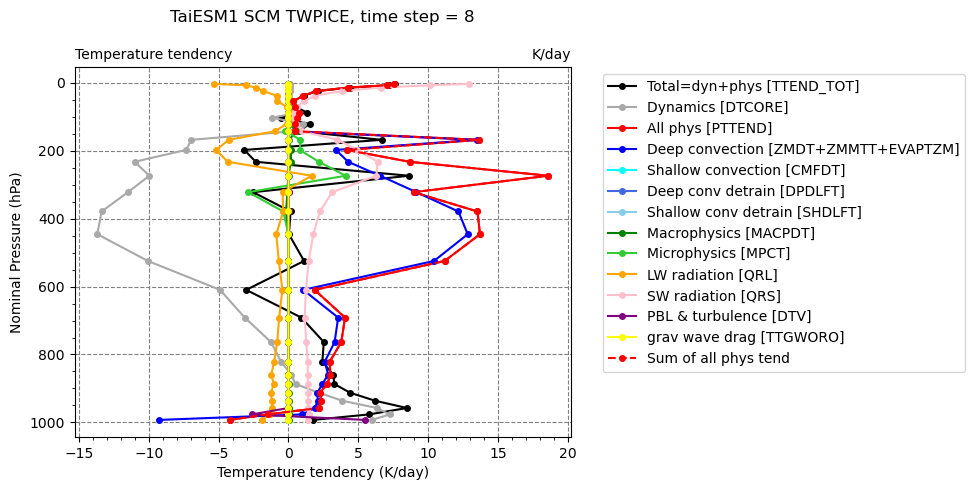

In [270]:
varnames = set_profile_varnames('DT_budget')

tt=8
plot_scm_profiles (ds_scm, varnames, tt=tt, xlabel="Temperature tendency")

### QV tendency

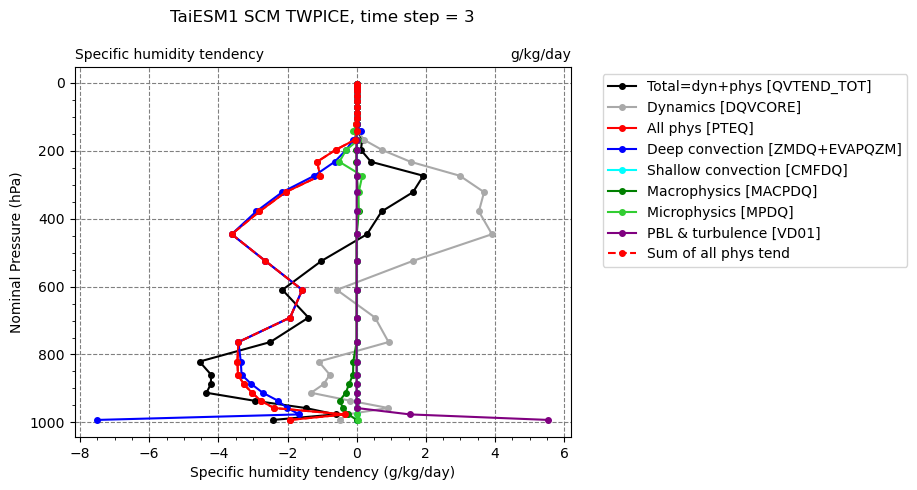

In [271]:
varnames = set_profile_varnames('DQV_budget')

tt=3
plot_scm_profiles (ds_scm, varnames, tt=tt, xlabel="Specific humidity tendency")

### QL tendency

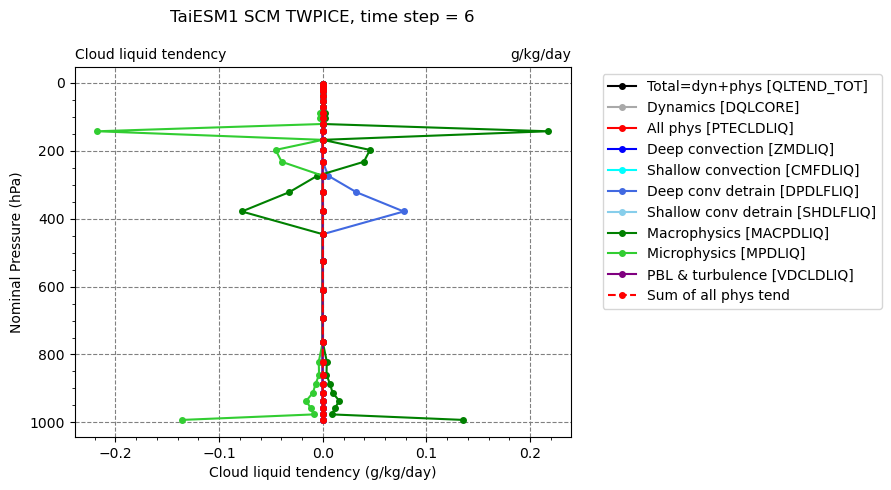

In [279]:
varnames = set_profile_varnames('DQL_budget')

tt=6
plot_scm_profiles (ds_scm, varnames, tt=tt, xlabel="Cloud liquid tendency")

### QI tendency

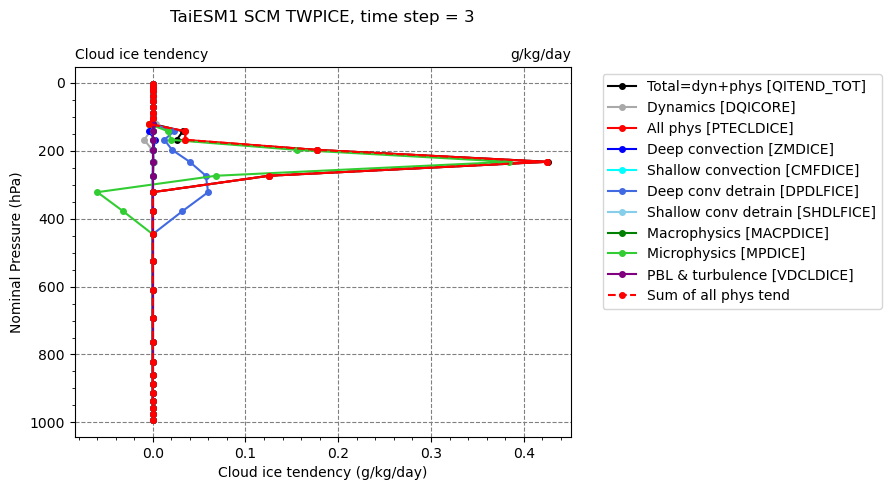

In [273]:
varnames = set_profile_varnames('DQI_budget')

tt=3
plot_scm_profiles (ds_scm, varnames, tt=tt, xlabel="Cloud ice tendency")

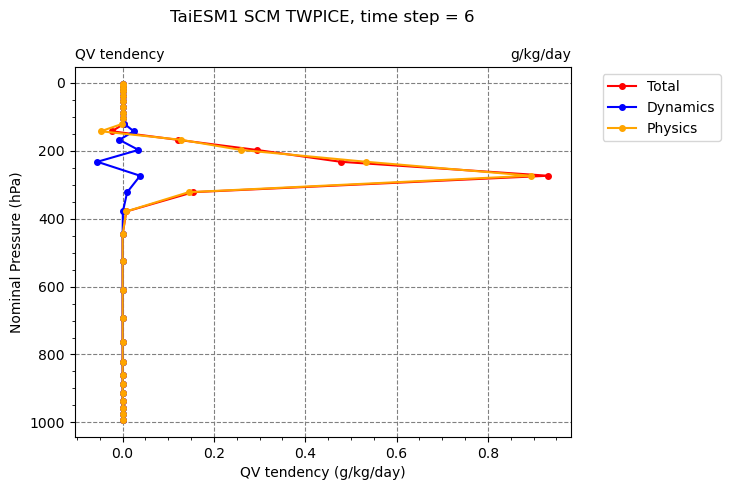

Index	lev	QLTEND_TOT	DQLCORE	PTECLDLIQ	Data4
1	3.64346569404006	0.0	6.760507034396587e-23	-6.760507034396587e-23	0.0
2	7.594819646328688	0.0	0.0	0.0	0.0
3	14.356632251292467	0.0	0.0	0.0	0.0
4	24.612220004200935	0.0	0.0	0.0	0.0
5	38.26829977333546	0.0	0.0	0.0	0.0
6	54.59547974169254	0.0	0.0	0.0	0.0
7	72.01245054602623	0.0	0.0	0.0	0.0
8	87.82123029232025	0.0	0.0	0.0	0.0
9	103.31712663173676	0.0	0.0	0.0	0.0
10	121.54724076390266	0.0	0.0	0.0	0.0
11	142.99403876066208	0.0	0.0	0.0	0.0
12	168.22507977485657	0.0	0.0	0.0	0.0
13	197.9080867022276	0.0	7.333604190486326e-29	-7.333604190486326e-29	0.0
14	232.82861895859241	-2.205815020220531e-26	5.152993103007986e-23	-5.155199073643346e-23	0.0
15	273.9108167588711	2.7222509920152306e-21	-6.597729688680938e-23	2.788228339389138e-21	0.0
16	322.2419023513794	9.63568450786112e-25	-2.9612608868320286e-26	9.931810072691378e-25	9.860761315262648e-32
17	379.10090386867523	5.480437034956007e-27	9.373395036148538e-26	-8.825351178578542e-26	0.0
18	445.9925740

In [280]:
varnames = {
        'QITEND_TOT': {'color': 'red', 'label': 'Total'},
        'DQICORE': {'color': 'blue', 'label':'Dynamics'},
        'PTECLDICE': {'color': 'orange', 'label': 'Physics'},
        #'PTEQ': {'color': 'orange', 'label': 'Physics'},
          }
tt=6
plot_scm_profiles (ds_scm, varnames, tt=tt, xlabel="QV tendency")

ppp = ds_scm.QLTEND_TOT[tt,:,0,0] - ds_scm.DQLCORE[tt,:,0,0] - ds_scm.PTECLDLIQ[tt,:,0,0]

yhc.print_1d_arrays(ds_scm.QLTEND_TOT[tt,:,0,0], ds_scm.DQLCORE[tt,:,0,0], ds_scm.PTECLDLIQ[tt,:,0,0], ppp)

In [162]:
yhc.lib('plt_basic')


    #-------------
    #
    # matplotlib.pyplot general
    #
    #-------------      

    #-------------------------- 
    #  open fig and ax
    #-------------------------- 

    #      matplotlib.pyplot.subplot, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html  
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 6))   # 1 row, 3 columns
    fig, ((ax_1, ax_2, ax_3), (ax_4, ax_5, ax_6)) = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # 2 rows, 3 columns

    fig, axs = plt.subplots(2, 3, figsize=(18, 6))  # 2 rows, 3 columns. axs[0, 0] refers to the top-left subplot
                                                                         axs[1, 2] refers to the bottom-right subplot
    
    fig.suptitle("title", fontsize = 20, y=0.95)   # add title

    #--- set spacing betweeon subplots
    #      https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/ 
    fig.tight_layout()
    #fig.tight_layout(pad=5.0) 